In [1]:
import numpy as np
import cv2  #converting images into arrays
import os #to specify location of images
import random
import matplotlib.pyplot as plt
import pickle #to save the data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
directory_tr = r'C:\Users\vijay\OneDrive\Desktop\Dataset\my_ds\train'
directory_ts = r'C:\Users\vijay\OneDrive\Desktop\Dataset\my_ds\test'
categories = ['cat','dog'] 

In [3]:
img_size = 110
data1 = []
data2 = []

In [4]:
for categ in categories:
    folder = os.path.join(directory_tr,categ)
    label= categories.index(categ) 
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data1.append([img_arr,label])

In [5]:
for categ in categories:
    folder = os.path.join(directory_ts,categ)
    labels= categories.index(categ) 
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data2.append([img_arr,labels])

In [6]:
print(len(data1))
print(len(data2))

2000
156


In [7]:
random.shuffle(data1)
random.shuffle(data2)

In [8]:
X_tr=[]
y_tr=[]
X_ts=[]
y_ts=[]
for features, labels in data1:
    X_tr.append(features)
    y_tr.append(labels)
for features, labels in data2:
    X_ts.append(features)
    y_ts.append(labels)

In [9]:
X_tr=np.array(X_tr)
y_tr=np.array(y_tr)
X_ts=np.array(X_ts)
y_ts=np.array(y_ts)

In [10]:
X_tr=X_tr/255
X_ts=X_ts/255

In [11]:
model = Sequential()

#first convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu')) #first layer is convolutional layer with 64 feature detectors of 3 by 3 matrix
                                                  # and an activation function as relu

model.add(MaxPooling2D((2,2))) #next layer is the maxpooling layer with a 2 by 2 matrix


#second convolutional layer
model.add(Conv2D(128, (3,3), activation = 'relu')) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation = 'relu')) 
model.add(MaxPooling2D(2,2))


# adding flatten and dense layers
model.add(Flatten())
model.add(Dense(128, input_shape=(150,150,3), activation='relu'))
model.add(Dense(2, activation = 'softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_tr, y_tr, epochs=2, batch_size=64)

Epoch 1/2
32/32 [==============================] - 55s 2s/step - loss: 0.6817 - accuracy: 0.5575
Epoch 2/2
32/32 [==============================] - 53s 2s/step - loss: 0.6223 - accuracy: 0.6560


In [15]:
model.evaluate(X_ts,y_ts)

5/5 [==============================] - 1s 194ms/step - loss: 0.5443 - accuracy: 0.6987


[0.5442541837692261, 0.6987179517745972]

In [16]:
prediction=model.predict(X_ts)

5/5 [==============================] - 2s 183ms/step


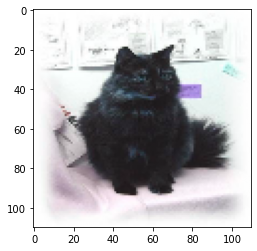

In [25]:
n = random.randint(0,155)
plt.imshow(X_ts[n])

In [20]:
max_value = np.argmax(prediction[n])
if max_value == 0:
    print('The image is of a Cat')
if max_value == 1:
    print('The image is of a Dog')

The image is of a Cat
